# Aim of the notebook

In this notebook we define domains based on the neighboring cell types of each cell, as proposed by Kukanja et al

# Import functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import squidpy as sq
import scanpy as sc
import os
from xb.formatting import format_data_neighs

# Load data

In [2]:
saving_path=r'../../data/processed_adata/'
adata=sc.read('../../data/processed_adata/adata_multisection_nuclei_r1_with_annotations.h5ad')

In [3]:
adata.obsm["spatial"]=np.array([adata.obs.X,adata.obs.Y]).transpose().astype('float64')
adata=adata[adata.obs['replicate']=='1']
adata.X=adata.layers['raw']

# ROI1

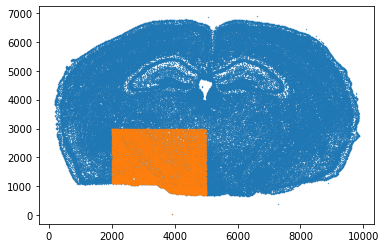

In [5]:
adata2=adata[(adata.obs['x_centroid']<5000)&(adata.obs['x_centroid']>2000)&(adata.obs['y_centroid']<3000)]
plt.scatter(adata.obs.loc[:,'x_centroid'],adata.obs.loc[:,'y_centroid'],s=0.1)
plt.scatter(adata2.obs.loc[:,'x_centroid'],adata2.obs.loc[:,'y_centroid'],s=0.1)
adata=adata2
ndoms=[]
for num in range(1,5):
    ndoms.append(len(np.unique(adata.obs['region_level'+str(num)])))

In [6]:
#hyperparameter 
neighs=[10,15,25]
ndoms=[]
for num in range(1,5):
    ndoms.append(len(np.unique(adata.obs['region_level'+str(num)])))
for ng in neighs:
    #level of annotation to work on
    ss='sample'
    annot='Class'
    an_concat=[]
    asub=adata
    adataneigh=format_data_neighs(asub,annot,ss,neighs=ng)
    for targetclust in ndoms:
        #adataneigh=sc.concat(an_concat)
        print('Number_of_clusters:'+str(targetclust))
#        adataneigh=sc.concat(an_concat)
        adataneigh.obsm["spatial"]=np.array([adataneigh.obs.X,adataneigh.obs.Y]).transpose().astype('float64')
        adataneigh.X=np.nan_to_num(adataneigh.X)
        adataneigh=adataneigh[adataneigh.obs['total_counts']>3]
        adataneigh.raw=adataneigh
        #sc.pp.normalize_total(adataneigh, target_sum=None)
        #sc.pp.log1p(adataneigh)
        sc.pp.neighbors(adataneigh, n_neighbors=20,n_pcs=0)
        sc.tl.umap(adataneigh,min_dist=0.1)
        res=0.05
        sc.tl.leiden(adataneigh,resolution=res,key_added='spatial_domain')
        sc.set_figure_params(scanpy=True, dpi=200)
    #    sc.pl.umap(adataneigh,color=['spatial_domain'],palette='Spectral')#,save='UMAP_10X_colors.svg')
        print(len(np.unique(adataneigh.obs['spatial_domain']))-targetclust)
        while abs(len(np.unique(adataneigh.obs['spatial_domain']))-targetclust)>2:
            if len(np.unique(adataneigh.obs['spatial_domain']))>targetclust:
                res=res-0.005
            else:
                res=res+0.02
            sc.tl.leiden(adataneigh,resolution=res,key_added='spatial_domain')
            print(len(np.unique(adataneigh.obs['spatial_domain'])))
        adataneigh.obs.loc[:,['cell_id','spatial_domain']].to_csv('../../figures/7.spatial_architecture/domains_predicted/ROI2/'+str(targetclust)+'/predicted_NEIGHBORS_neighs'+str(ng)+'.csv')


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 212.97it/s]
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/ipykernel_launcher.py:463: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Number_of_clusters:5
3
7
Number_of_clusters:6
2
Number_of_clusters:10
-2
Number_of_clusters:16
-8
10
11
11
12
12
12
12
13
14


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 295.11it/s]
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/ipykernel_launcher.py:463: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Number_of_clusters:5
5
9
8
6
Number_of_clusters:6
4
9
8
Number_of_clusters:10
0
Number_of_clusters:16
-6
10
11
12
12
12
12
13
13
14


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 271.48it/s]
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/ipykernel_launcher.py:463: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Number_of_clusters:5
2
Number_of_clusters:6
1
Number_of_clusters:10
-3
10
Number_of_clusters:16
-9
10
10
12
12
12
13
13
13
14
